<h1><b>Laboratory work 2</b></h1>

<h3><b>Topic:</b> Data exploration and visualization with Python</h3>

<h3><b>Objective: </b> Gain basic skills in using Python for data exploration and visualization.
</h3>

<h3><center><b>Progress of work</b></center></h3>

In [2]:
print('Variant:' +  str(ord("D") % 3 + 1))

Variant:3


In [4]:
pip install numpy

   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.6 MB 8.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.4/12.6 MB 10.3 MB/s eta 0:00:01
   --------------- ------------------------ 4.7/12.6 MB 8.6 MB/s eta 0:00:01
   ------------------- -------------------- 6.0/12.6 MB 9.0 MB/s eta 0:00:01
   ----------------------------- ---------- 9.2/12.6 MB 9.5 MB/s eta 0:00:01
   ---------------------------------- ----- 10.7/12.6 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 9.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np

<h5><b>Assignment 1: </b> Create a function, that takes filename and column name as a parameter and
return a numpy array of a column values.</54>

In [10]:
import csv

In [11]:
def get_column_values(filename, column_name):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)
        col_index = header.index(column_name)
        data = np.array([row[col_index] for row in reader], dtype=int)
        
        return data

<h5><b>Assignment 2: </b>Using function from task1, create a numpy array out of values of “APC”
column.</h5>

In [12]:
apc_values = get_column_values('russia_losses_equipment.csv', 'APC')

print(apc_values)

[17063 17043 17003 16955 16938 16925 16906 16897 16878 16878 16869 16848
 16821 16786 16760 16736 16722 16699 16681 16667 16648 16631 16620 16599
 16567 16542 16521 16495 16480 16473 16461 16426 16402 16385 16368 16363
 16350 16341 16332 16323 16294 16286 16255 16238 16211 16203 16161 16141
 16103 16095 16074 16050 16039 16013 16000 15980 15963 15917 15902 15883
 15871 15862 15826 15811 15779 15755 15732 15715 15704 15685 15645 15629
 15611 15600 15583 15566 15550 15524 15505 15480 15459 15450 15431 15413
 15398 15383 15372 15337 15319 15307 15287 15269 15263 15234 15208 15187
 15176 15144 15131 15105 15096 15076 15036 15020 15002 14980 14947 14935
 14913 14891 14858 14818 14803 14786 14775 14748 14721 14699 14665 14630
 14595 14552 14538 14508 14460 14417 14375 14353 14313 14281 14246 14227
 14213 14179 14156 14129 14096 14067 14046 14007 13991 13971 13957 13942
 13928 13916 13904 13896 13873 13852 13835 13827 13809 13796 13765 13745
 13698 13679 13667 13620 13575 13551 13497 13459 13

<h5><b>Assignment 3:</b> Find daily APC losses.</h5>

In [13]:
def find_daily_losses(filename, column_name="APC"):
    apc_values = get_column_values(filename, column_name) 
    daily_losses = np.diff(apc_values)
    
    return daily_losses

In [14]:
print(find_daily_losses('russia_losses_equipment.csv'))

[ -20  -40  -48  -17  -13  -19   -9  -19    0   -9  -21  -27  -35  -26
  -24  -14  -23  -18  -14  -19  -17  -11  -21  -32  -25  -21  -26  -15
   -7  -12  -35  -24  -17  -17   -5  -13   -9   -9   -9  -29   -8  -31
  -17  -27   -8  -42  -20  -38   -8  -21  -24  -11  -26  -13  -20  -17
  -46  -15  -19  -12   -9  -36  -15  -32  -24  -23  -17  -11  -19  -40
  -16  -18  -11  -17  -17  -16  -26  -19  -25  -21   -9  -19  -18  -15
  -15  -11  -35  -18  -12  -20  -18   -6  -29  -26  -21  -11  -32  -13
  -26   -9  -20  -40  -16  -18  -22  -33  -12  -22  -22  -33  -40  -15
  -17  -11  -27  -27  -22  -34  -35  -35  -43  -14  -30  -48  -43  -42
  -22  -40  -32  -35  -19  -14  -34  -23  -27  -33  -29  -21  -39  -16
  -20  -14  -15  -14  -12  -12   -8  -23  -21  -17   -8  -18  -13  -31
  -20  -47  -19  -12  -47  -45  -24  -54  -38  -73  -18  -18  -29  -17
  -20  -20  -27  -21   -9  -24  -25  -28  -19  -37  -16   -9  -35  -17
  -24  -24  -11  -17  -20  -27  -24  -27  -25  -19  -51  -40  -28  -21
  -28 

<h5><b>Assignment 4:</b> Find the 5 greatest daily losses of APC.</h5>

In [15]:
def find_top_5_losses(filename, column_name="APC"):
     daily_losses = find_daily_losses(filename, column_name)
     top_5_losses = np.sort(daily_losses)[:5]
    
     return top_5_losses[::1]

In [16]:
print(find_top_5_losses('russia_losses_equipment.csv'))

[-190 -120 -110  -96  -91]


<h5><b>Assignment 5:</b> Determine how many APC were destroyed in the summer of 2024.</h5>

In [17]:
from datetime import datetime

In [28]:
def get_dates(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)
        
        try:
            date_col_index = header.index("date")
        except ValueError:
            raise ValueError(f"Column 'date' not found.")
        
        dates = []
        for row in reader:
            try:
                date = datetime.strptime(row[date_col_index], "%Y-%m-%d")
                dates.append(date)
            except ValueError:
                continue
        
        return np.array(dates)

In [29]:
def apc_losses_in_summer(filename, column_name="APC"):
    daily_losses = get_column_values(filename, column_name)
    
    dates = get_dates(filename)
    
    summer_mask = (dates >= datetime(2024, 6, 1)) & (dates <= datetime(2024, 8, 31))
    summer_losses = daily_losses[summer_mask]
    
    total_summer_losses = np.sum(summer_losses)
    
    return total_summer_losses

In [30]:
print(apc_losses_in_summer('russia_losses_equipment.csv'))

1459103


<h5><b>Assignment 6:</b> Find the mean value of destroyed APC between 100 and 500 days of war.</h5>

In [31]:
def find_mean_losses(filename, start_day=100, end_day=500, column_name="APC"):
    daily_losses = get_column_values(filename, column_name)
    
    if len(daily_losses) < end_day:
        raise ValueError(f"Дані закінчуються раніше, ніж {end_day}-ий день.")
    
    selected_losses = daily_losses[start_day-1:end_day]
    
    mean_losses = np.mean(selected_losses)
    
    return int(mean_losses)

In [32]:
print(find_mean_losses('russia_losses_equipment.csv'))

10516


<h5><b>Assignment 7:</b> Create a plot of APC losses of last 200 days (starting from last date in
dataset)</h5>

In [23]:
!pip install matplotlib

In [24]:
import matplotlib.pyplot as plt

In [33]:
def plot_last_200_apc_losses(filename, column_name="APC"):
    daily_losses = get_column_values(filename, column_name)
    
    dates = get_dates(filename)
    
    if len(daily_losses) < 200:
        raise ValueError("Дані мають бути довші за 200 днів.")
    
    last_200_losses = daily_losses[-200:]
    last_200_dates = dates[-200:]
    
    plt.figure(figsize=(8, 16), dpi=100)
    
    plt.plot(last_200_dates, last_200_losses, linestyle='--', color='b', label="APC losses")
    
    plt.title("APC Losses Over Last 200 Days", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Number of APC Destroyed", fontsize=12)
    
    plt.grid(True, which='both', linestyle=':', color='gray')
    
    plt.legend(loc="upper right")
    
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.savefig('apc_losses_last_200_days.png', format='png')
    
    plt.show()

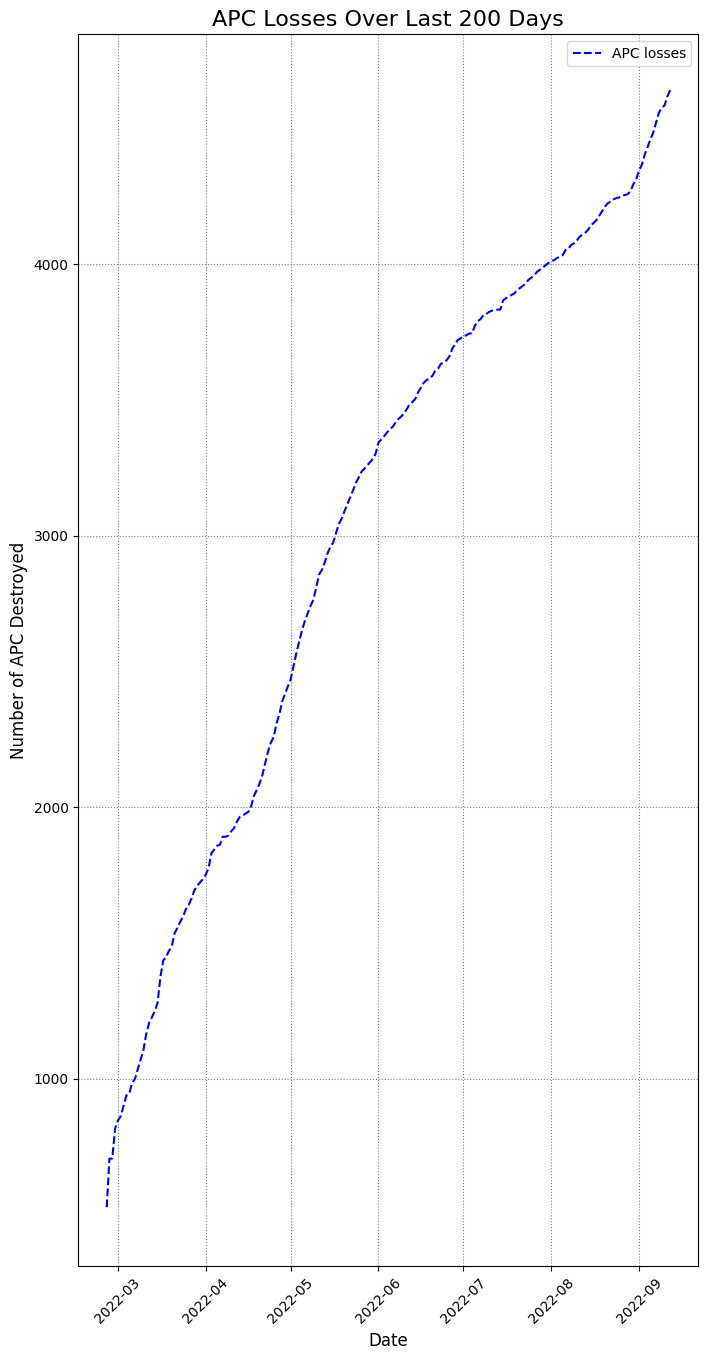

In [34]:
plot_last_200_apc_losses('russia_losses_equipment.csv')

<h4><b>Conclusion: </b> durnig this laboratory work i got to know how to work with numpy arrays, how to explore data from .csv files and how to create plots for specified data with set requirements for visualization.</h4>